#### Worldwide - Confirmed Cases

In [1]:
import pandas as pd
df = pd.read_csv('covid_19_data.csv',parse_dates=['Last Update'],index_col=0) 
#parsing according to the last update datetime column
#serial number as index
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
#renaming certain columns

In [2]:
from fbprophet import Prophet

In [3]:
#Fixing data for forecasting
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed['cap']= 10000000
confirmed.head()

,ds,y,cap
0,2020-01-22,555.0,10000000
1,2020-01-23,653.0,10000000
2,2020-01-24,941.0,10000000
3,2020-01-25,1438.0,10000000
4,2020-01-26,2118.0,10000000


In [4]:
m = Prophet(interval_width=0.95,growth = 'logistic',n_changepoints=5)
m.fit(confirmed)
future = m.make_future_dataframe(periods=200)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
266,2020-10-14
267,2020-10-15
268,2020-10-16
269,2020-10-17
270,2020-10-18


In [5]:
future['cap']=10000000
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
266,2020-10-14,9.999056e+06,9.933121e+06,1.006544e+07
267,2020-10-15,9.998494e+06,9.932657e+06,1.006149e+07
268,2020-10-16,1.000056e+07,9.935710e+06,1.006266e+07
269,2020-10-17,1.000143e+07,9.937782e+06,1.006204e+07
270,2020-10-18,1.000070e+07,9.934252e+06,1.006628e+07


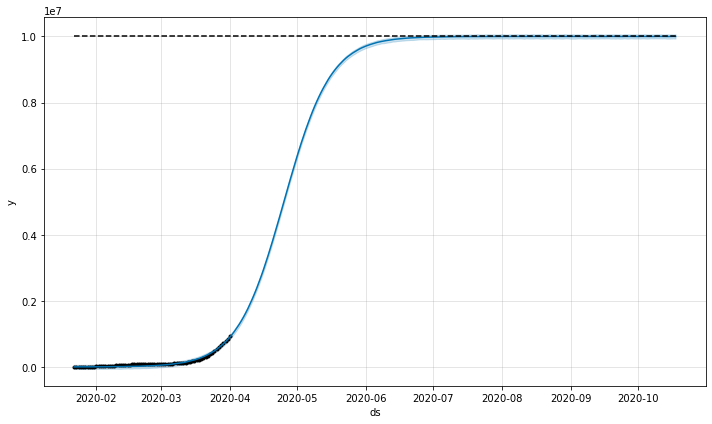

In [6]:
fig = m.plot(forecast)

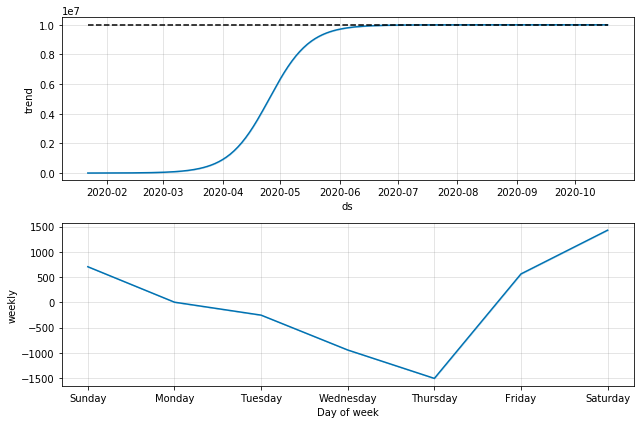

In [7]:
fig1=m.plot_components(forecast)

#### Worldwide - Deaths

In [8]:
#fixing data
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
deaths['cap']= 10000000
deaths.head()

,ds,y,cap
0,2020-01-22,17.0,10000000
1,2020-01-23,18.0,10000000
2,2020-01-24,26.0,10000000
3,2020-01-25,42.0,10000000
4,2020-01-26,56.0,10000000


In [9]:
m1 = Prophet(interval_width=0.95,growth = 'logistic',n_changepoints=5)
m1.fit(deaths)
future = m1.make_future_dataframe(periods=200)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
266,2020-10-14
267,2020-10-15
268,2020-10-16
269,2020-10-17
270,2020-10-18


In [10]:
future['cap']=10000000
forecast = m1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
266,2020-10-14,9.999979e+06,9.998048e+06,1.000181e+07
267,2020-10-15,9.999949e+06,9.998000e+06,1.000183e+07
268,2020-10-16,1.000001e+07,9.997851e+06,1.000187e+07
269,2020-10-17,1.000005e+07,9.998171e+06,1.000199e+07
270,2020-10-18,1.000002e+07,9.998001e+06,1.000210e+07


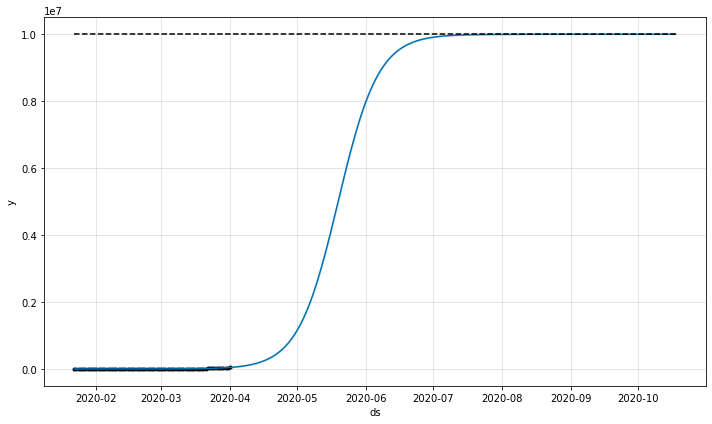

In [11]:
fig = m1.plot(forecast)

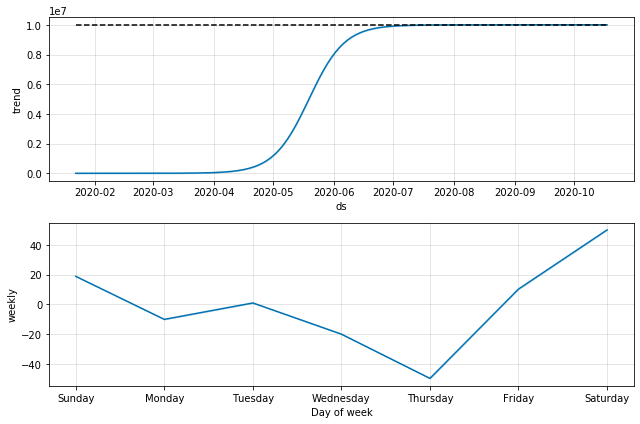

In [12]:
fig1=m1.plot_components(forecast)

#### Worldwide - Recovery

In [13]:
#fixing data
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])
recovered['cap']= 10000000
recovered.head()

,ds,y,cap
0,2020-01-22,28.0,10000000
1,2020-01-23,30.0,10000000
2,2020-01-24,36.0,10000000
3,2020-01-25,39.0,10000000
4,2020-01-26,52.0,10000000


In [14]:
m2 = Prophet(interval_width=0.95,growth = 'logistic',n_changepoints=5)
m2.fit(recovered)
future = m2.make_future_dataframe(periods=200)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
266,2020-10-14
267,2020-10-15
268,2020-10-16
269,2020-10-17
270,2020-10-18


In [15]:
future['cap']=10000000
forecast = m2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
266,2020-10-14,9.985645e+06,9.971666e+06,9.999296e+06
267,2020-10-15,9.984985e+06,9.971814e+06,9.997475e+06
268,2020-10-16,9.985678e+06,9.972200e+06,9.999692e+06
269,2020-10-17,9.986709e+06,9.973879e+06,1.000049e+07
270,2020-10-18,9.987578e+06,9.974738e+06,1.000117e+07


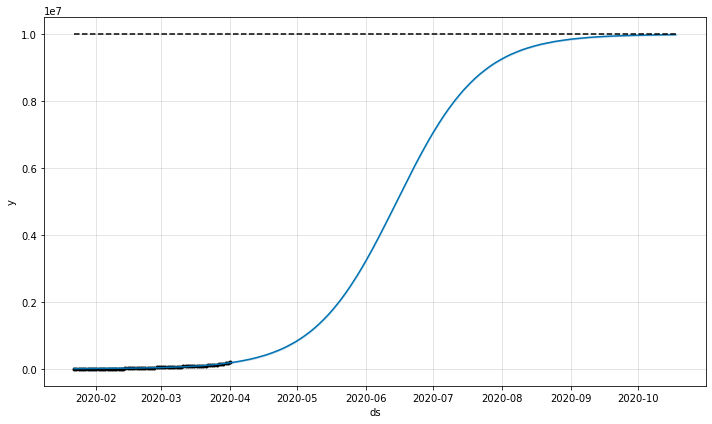

In [16]:
fig = m2.plot(forecast)

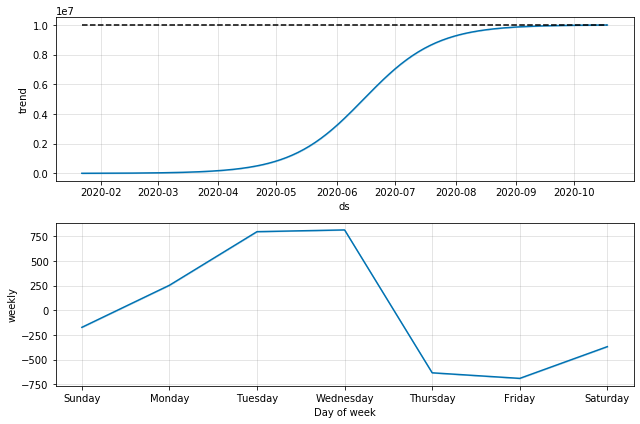

In [17]:
fig1=m2.plot_components(forecast)